In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram


In [ ]:
N=3
D=3
X,y=make_blobs(n_samples=100,centers=N,n_features=D,random_state=1, cluster_std=2)
df=pd.DataFrame(X)
df['Class']=y


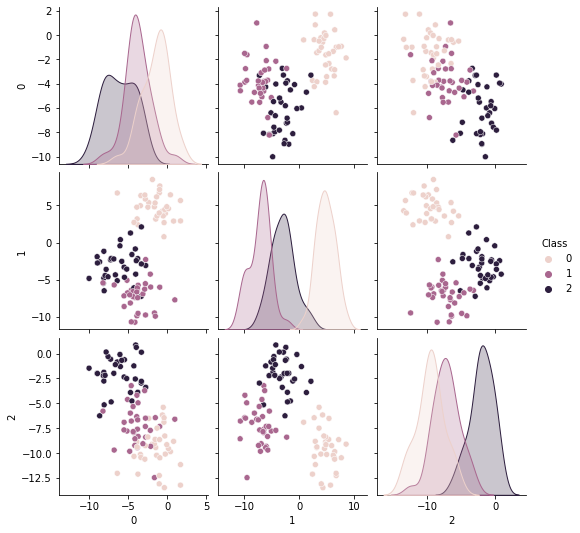

In [ ]:
sns.pairplot(df,hue='Class')

In [ ]:
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()


,0,1,2
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-1.731948e-16,5.884182e-17,-7.416290e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.372108e+00,-1.697652e+00,-1.951363e+00
25%,-6.501544e-01,-8.330191e-01,-7.789808e-01
50%,-1.424261e-02,-1.763395e-01,-1.114115e-01
75%,8.151489e-01,1.004515e+00,9.243758e-01
max,2.090876e+00,1.931781e+00,1.955290e+00


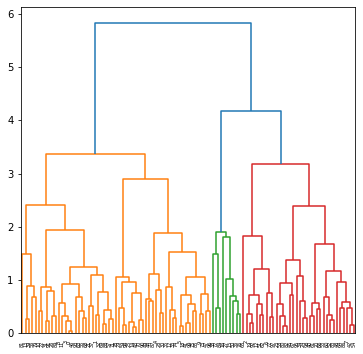

In [ ]:
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(6,6))
dendrogram(mergings)
plt.show()


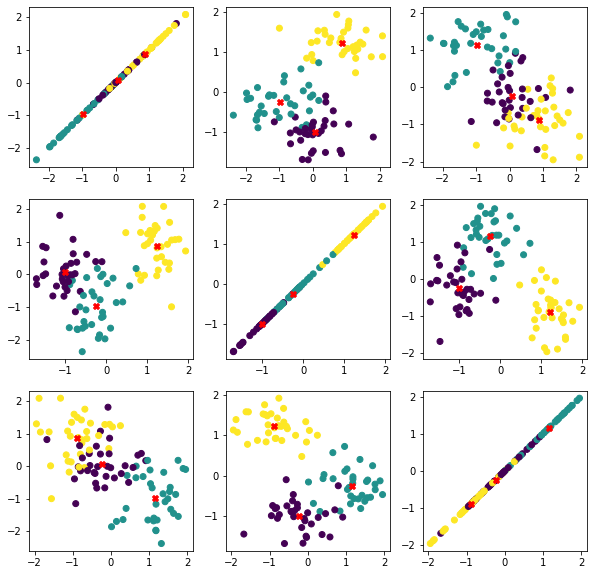

In [ ]:
model = KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
y=model.predict(df_t)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j], marker='X', c='red')


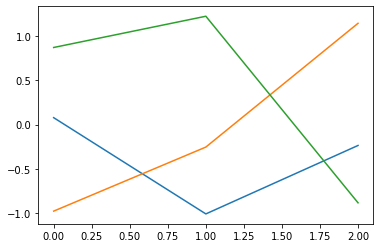

In [ ]:
means1 = []
means2 = []
means3 = []

def means(field, cluster, means):
    count = 0
    sum = 0
    i = 0
    for row in df_t[field]:
        if model.labels_[i] == cluster:
            count += 1
            sum += row
        i += 1
    means.append(sum / count)

means(0, 0, means1)
means(1, 0, means1)
means(2, 0, means1)


means(0, 1, means2)
means(1, 1, means2)
means(2, 1, means2)


means(0, 2, means3)
means(1, 2, means3)
means(2, 2, means3)




digit = [0, 1, 2]

plt.plot(digit, means1)
plt.plot(digit, means2)
plt.plot(digit, means3)


In [ ]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный
    model=type_model
    #построим модель
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y))
    return splot


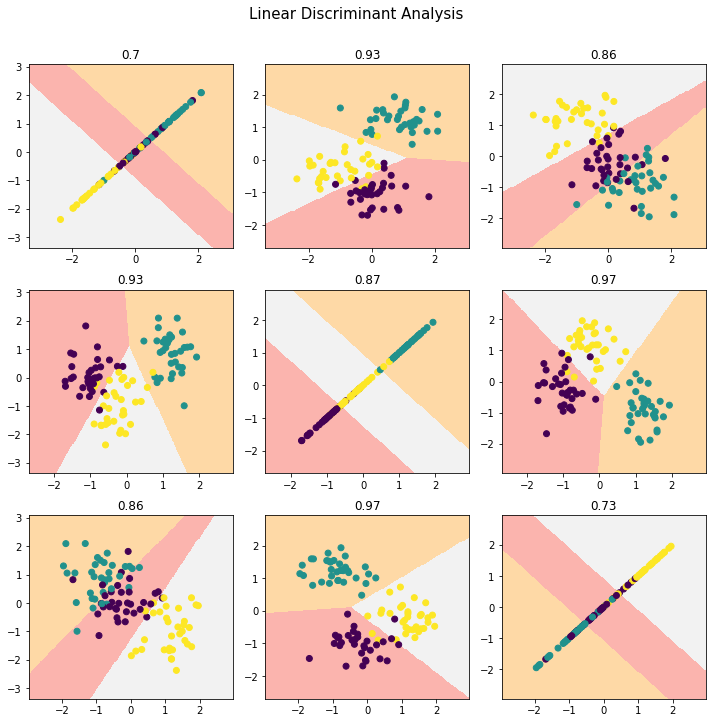

In [ ]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,lda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


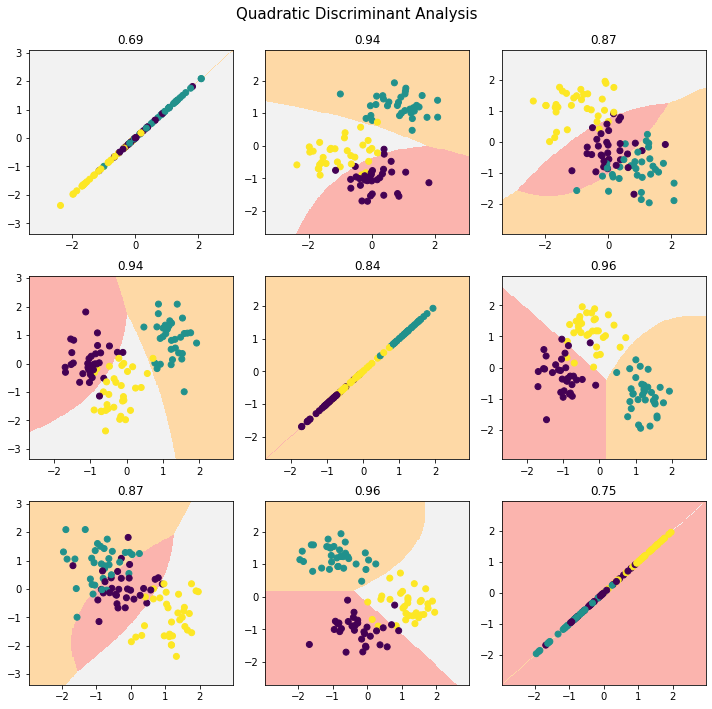

In [ ]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,qda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
